In [122]:
%matplotlib inline

from pathlib import Path 


import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms

from mpl_toolkits.axisartist.axislines import AxesZero


import tikzplotlib 

import papercolors as pc
from papercolors import colordict as pcd

paper_path = Path('../figures/tex/')


fs={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}

In [3]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
mpl.rc('font', family='serif', serif="Times New Roman")
mpl.rcParams['figure.dpi']=300
mpl.rc("pgf", texsystem = "pdflatex", preamble = "\n".join([r"\usepackage{inputenc}", r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}", r'\usepackage{{amsmath}}']))

In [14]:
def numberline(axes, x, y, width, height, axes_color='dimgray'):
    numberline = axes.inset_axes([x, y, width, height])
    numberline.spines[["left", "right", "top"]].set_visible(False) 
    numberline.set(xlim=(-2, 2*np.pi+2), xticks=[0, 2*np.pi],
         xticklabels = ['0', r'$2\pi$'], 
         yticks=[], ylim=(-.2,.2))
    for (pos, mark) in [(0, "<"), (1, ">")]:
        numberline.plot(pos,0, mark, color=axes_color, markersize=4, 
                         transform=numberline.get_yaxis_transform(), clip_on=False)
    numberline.tick_params('x', direction='inout', colors=axes_color, labelsize=fs['script'])
    numberline.spines['bottom'].set_color(axes_color)
    numberline.spines['bottom'].set_position(('data', 0))
    return numberline

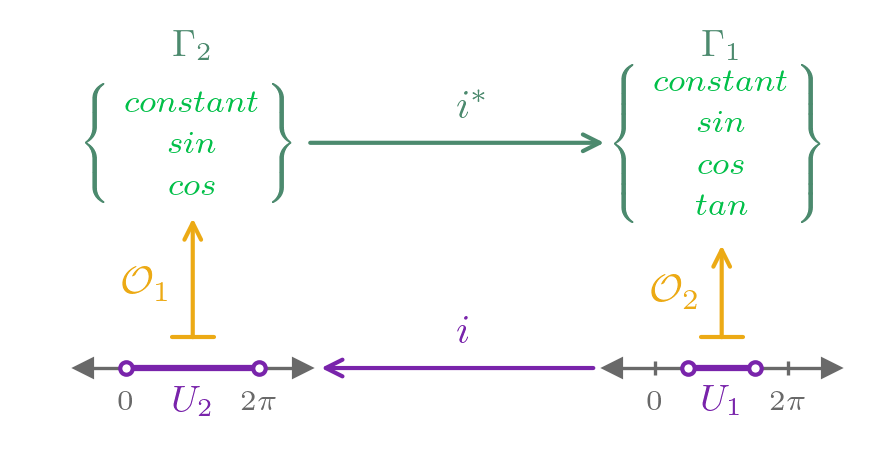

In [137]:
fig, ax = plt.subplots(figsize=(3.5, 1.5))
r = fig.canvas.get_renderer()

x1 = .2
x2 = .85 
y1 = .8
y2 = .1

br2 = ax.text(x1, y1, r'$\begin{Bmatrix}\phantom{constantx}\\ \phantom{sin} \\ \phantom{cos} \\ \end{Bmatrix}$', 
              ha='center', va='center', color=pcd['set'], fontsize=fs['footnote'])
g2 = ax.text(x1, y1, r'$\begin{matrix} constant\\sin\\cos\\\end{matrix}$', 
             ha='center', va='center', color=pcd['section'], fontsize=fs['footnote'])

br1 = ax.text(x2, y1, r'$\begin{Bmatrix}\phantom{constantx}\\ \phantom{sin} \\ \phantom{cos} \\ \phantom{tan}\\\end{Bmatrix}$', 
              ha='center', va='center', color=pcd['set'], fontsize=fs['footnote'])
g1 = ax.text(x2, y1, r'$\begin{matrix} constant\\sin\\cos\\tan\\\end{matrix}$', 
             ha='center', va='center', color=pcd['section'], fontsize=fs['footnote'])

#make nodes
axh = .1

bb = br2.get_window_extent(renderer=r).transformed(ax.transData.inverted())
axw = bb.width

u2 = numberline(ax, x1-axw/2, y2, axw, axh)
u1 = numberline(ax, x2-axw/2, y2, axw, axh)

#annotate nodes
g1a = ax.annotate(r"$\Gamma_1$", (.5, 1), color=pcd['set'], 
                  xycoords=br1, va='bottom', ha='center', fontsize=fs['small'])
                  
g2a = ax.annotate(r"$\Gamma_2$", (.5, 0), color=pcd['set'], 
                  xycoords=(br2, g1a), va='bottom', ha='center', fontsize=fs['small'])
    
u1a = u1.annotate(f"$U_1$", (0, .01), xycoords=(g1a, 'axes fraction'), 
                  color=pcd['base'], va='top' , fontsize=fs['small'])
u2a = u2.annotate(f"$U_2$", (0, -.01), xycoords=(g2a, 'axes fraction'), 
                  color=pcd['base'], va='top', fontsize=fs['small'])
    
p_kwargs = dict( marker= 'o', mfc='white', lw=1.5, markersize=3, color=pcd['base'], zorder=10)
u2.plot([0, 2*np.pi], [0,0], **p_kwargs)
u1.plot([np.pi/2, 3*np.pi/2], [0,0],**p_kwargs)

# annotate: tail, head

u1_u2 = ax.annotate("", (1.05, 0), (-.05,0), xycoords=(u2.transAxes, u2.transData), 
                    textcoords= (u1.transAxes, u1.transData),
                    arrowprops=dict(arrowstyle = "->", color=pcd['base']))

u1_u2_l = ax.annotate(r"$i$", (.5, 1.5), xycoords=u1_u2, 
                      color=pcd['base'], ha='center', va='bottom', fontsize=fs['normal']) 

g2_g1 = ax.annotate("", (0, .5), (1,.5) , xycoords=br1, textcoords=br2, 
                   arrowprops=dict(arrowstyle = "->", color=pcd['set']))

g2_g1_l = ax.annotate("$i^*$", (0, 1.5), xycoords=(u1_u2_l, g2_g1), 
                      color=pcd['set'], va='bottom', fontsize=fs['normal'])


sheafs = {i : ax.annotate("", (.5, -.15), (.5, 1.15), xycoords=head, textcoords=tail, 
                      arrowprops=dict(arrowstyle="]->,widthA=.5,lengthA=0", color=pcd['sheaf'])) 
          for (i, tail, head) in [(2, u2, g2), (1, u1, g1)]}
    
    
sheaf1_l = ax.annotate(r"$\mathcal{O}_{1}$", (0, .5), xycoords=sheafs[2], 
                       ha='right', va='center', color=pcd['sheaf'], fontsize=fs['normal'])
 
sheaf1_2 = ax.annotate(r"$\mathcal{O}_{2}$", (0, 0), xycoords=(sheafs[1], sheaf1_l), 
                       ha='right', color=pcd['sheaf'], fontsize=fs['normal'])


ax.axis('off')
ax.set(xlim=(0,1), ylim=(0,1))
fig.savefig(paper_path/'presheaf.pdf', bbox_inches='tight', backend='pgf')

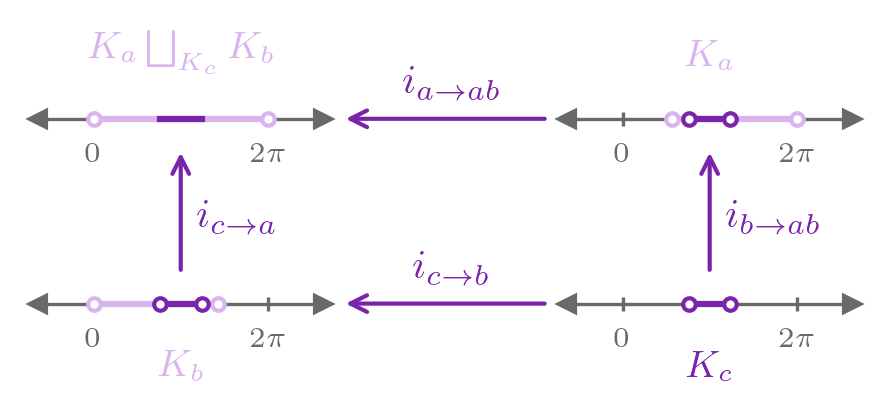

In [156]:
fig, ax = plt.subplots(figsize=(3.5, 1))

ax.set(xlim=(0,1), ylim=(0,1))

axh = .2
axw = .35
y1 = 0
y2 = 1-axh
x1 = 0
x2 = 1-axw

axu = {lab: numberline(ax, x, y, axw, axh) for lab, (x,y) in 
         [("abc", (x1, y2)), ("a", (x2, y2)), ("b", (x1, y1)), ("c", (x2, y1))]}


# annotate: xy=head, xytext=tail

arrow_kwargs = dict(arrowprops=dict(arrowstyle = "->", color=pcd['base']))
text_kwargs = dict(color=pcd['base'], fontsize=fs['normal'])

arcb = ax.annotate("", xy=(1.05,.5), xytext=(-.05,.5), 
                   xycoords=axu['b'].transAxes, textcoords=axu['c'].transAxes, 
                  **arrow_kwargs)
                   
arcba = ax.annotate(r"$i_{c\rightarrow b}$", (.5, 1.5), xycoords=arcb, 
                    ha='center', va='bottom', **text_kwargs)
            

araabc = ax.annotate("", xy=(1.05,.5), xytext=(-.05,.5), 
                   xycoords=axu['abc'].transAxes, textcoords=axu['a'].transAxes, 
                  **arrow_kwargs)
                   
araabca = ax.annotate(r"$i_{a\rightarrow ab}$", (.5, 1.5), xycoords=araabc, 
                      ha='center', va='bottom', **text_kwargs)

arca = ax.annotate("", xy=(.5, -.05), xytext=(.5, 1.05), 
                   xycoords=axu['a'].transAxes, textcoords=axu['c'].transAxes, 
                  **arrow_kwargs)
                   
arcaa = ax.annotate(r"$i_{b\rightarrow ab}$", (1.5, 0.5), xycoords=arca, 
                    ha='left', va='center', **text_kwargs)
            

araabc = ax.annotate("", xy=(.5, -.05), xytext=(.5, 1.05), 
                   xycoords=axu['abc'].transAxes, textcoords=axu['b'].transAxes, 
                  **arrow_kwargs)
                   
araabca = ax.annotate(r"$i_{c\rightarrow a}$", (1.5, 0.5), xycoords=araabc, 
                      ha='left', va='center', **text_kwargs)

akwargs = dict(xycoords='axes fraction', ha='center', fontsize=fs['small'])

p_kwargs = dict(lw = 1.5, marker= 'o', mfc='white', markersize=3)


kc_color = pc.lighten(pcd['base'], 1)
kl_color = pc.lighten(pcd['base'], .3)

axu['c'].annotate(r"$K_c$", (.5, -.5), va='top', **akwargs, color=kc_color)

for a in ['a', 'b', 'c']:
    axu[a].plot([np.pi-.75, np.pi+.75], [0,0],  zorder=10, **p_kwargs, color=kc_color)
    
axu['abc'].annotate(r"$K_a\bigsqcup_{K_c}K_b$", xy=(.5,1.5), va='bottom', **akwargs, 
                   color=kl_color)

axu['b'].plot([0, np.pi+1.35], [0,0], zorder=9, **p_kwargs, color=kl_color)

axu['a'].annotate(r"$K_a$", (.5, 1.5), va='bottom', **akwargs, color=kl_color)

axu['a'].plot( [np.pi-1.35, 2*np.pi], [0,0], zorder=9, **p_kwargs, color=kl_color)

axu['b'].annotate(r"$K_b$", (.5, -.5), va='top', **akwargs, color=kl_color)


axu['abc'].plot([0, 2*np.pi], [0,0], **p_kwargs, zorder=9, color=kl_color)
axu['abc'].plot([np.pi-.75, np.pi+.75], [0,0],  zorder=10, lw=1.5, color=kc_color)

ax.axis('off')
ax.set(xlim=(0,1), ylim=(0,1))

fig.savefig(paper_path/'presheaf.pdf', bbox_inches='tight', backend='pgf')


In [119]:
pcd['base']

'#7924AB'